**1.Importing Libraries:**

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_classif
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.tree import export_graphviz
import graphviz
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

**Loading dataset:**

In [74]:
rna_seq = pd.read_csv('/content/drive/MyDrive/ACC/TCGA-PANCAN-HiSeq-801x20531/data.csv',)

In [75]:
rna_seq.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [76]:
labels = pd.read_csv('/content/drive/MyDrive/ACC/TCGA-PANCAN-HiSeq-801x20531/labels.csv')

In [77]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


**exploring Data:**

In [78]:
rna_merged = pd.concat([rna_seq, labels], axis=1)

In [79]:
exp = rna_merged.set_index('Class').sort_index()

In [80]:
exp.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Unnamed: 0
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,sample_341,0.0,3.801873,5.025591,6.404150,9.564754,0.0,9.997688,1.025241,0.0,...,8.507347,9.849333,8.184360,9.796564,11.607552,10.456272,9.949412,5.980037,0.000000,sample_341
BRCA,sample_228,0.0,3.277330,2.629846,6.000487,9.627027,0.0,8.375748,1.029559,0.0,...,9.015499,10.244994,5.172335,9.788066,11.582057,11.098776,9.909158,5.494595,0.000000,sample_228
BRCA,sample_756,0.0,1.149975,0.462576,5.861427,10.092440,0.0,5.445833,1.045932,0.0,...,9.549727,10.037602,6.636375,9.459339,10.109922,10.442394,9.574616,3.541862,0.000000,sample_756
BRCA,sample_225,0.0,4.538159,3.955722,6.259862,9.103243,0.0,6.918327,1.162726,0.0,...,9.813018,10.629311,7.128757,10.409104,11.195225,11.169593,10.513451,6.729131,0.270828,sample_225
BRCA,sample_445,0.0,2.599770,2.562792,7.365491,10.462155,0.0,7.922370,0.000000,0.0,...,8.267555,9.630254,5.531385,9.241642,11.459872,10.045882,9.091528,9.356654,0.000000,sample_445


<Axes: >

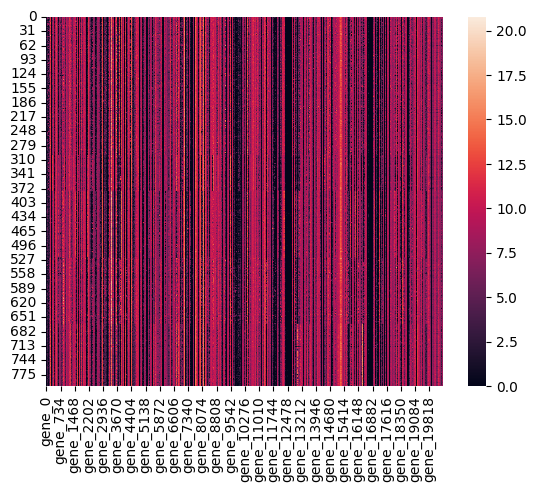

In [82]:


sns.heatmap(exp)

**2.Feature Engineering:**

In [86]:
rna_seq["labels"] = labels["Class"]

Above code associates each row in the rna_seq DataFrame with a corresponding class label from the labels DataFrame by adding the "labels" column to rna_seq

In [87]:
rna_seq.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,labels
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [88]:
rna_seq.shape

(801, 20533)

In [89]:
rna_seq.index.value_counts()

,count
0,1
538,1
528,1
529,1
530,1
531,1
532,1
533,1
534,1
535,1


In [90]:
rna_seq.isnull().values.any()

False

In [91]:
def reduce_by_zeros(rna_seq, threshold=0.95): #reduce datafram by zeros
    threshold_count = int(rna_seq.shape[0] * threshold)
    zero_counts = (rna_seq == 0).sum()
    reduced_columns = zero_counts[zero_counts <= threshold_count].index

    return rna_seq[reduced_columns]

In above code, the function filters out columns from the rna_seq DataFrame that have more than a specified proportion of zero values, effectively reducing the DataFrame by removing those columns.

In [92]:
reduced_df = reduce_by_zeros(rna_seq)

In [93]:
def reduce_by_col_std(rna_seq, threshold=0.1): #reduce by dataframe column standard deviation
    for column in rna_seq.columns[1:-1]:

            column_data = rna_seq[column]
            column_mean = column_data.mean()
            column_std = column_data.std()

            if column_std < (threshold * column_mean):
                rna_seq.drop(column, axis=1, inplace=True)

    return rna_seq

In Above code the function iterates through the specified columns of the rna_seq DataFrame and drops any column where the standard deviation is less than a certain fraction of the mean, as determined by the given threshold. This helps to remove columns that have relatively low variability and might not be informative.

In [94]:
reduced_df = reduce_by_col_std(reduced_df)

In [95]:
reduced_df.to_csv('/content/drive/My Drive/reduced_rna_seq.csv', index=False)

In [96]:
reduced_df = pd.read_csv("/content/drive/My Drive/reduced_rna_seq.csv")

In [97]:
reduced_df

,Unnamed: 0,gene_1,gene_2,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,gene_14,...,gene_20508,gene_20509,gene_20511,gene_20514,gene_20520,gene_20521,gene_20524,gene_20529,gene_20530,labels
0,sample_0,2.017209,3.265527,7.175175,0.591871,0.591871,1.334282,2.015391,0.591871,0.000000,...,6.239396,0.000000,0.000000,7.128881,7.205236,4.926711,7.220030,5.286759,0.000000,PRAD
1,sample_1,0.592732,1.588421,6.816049,0.000000,0.000000,0.587845,2.466601,1.004394,0.000000,...,4.708877,0.811142,0.000000,6.047558,10.639259,4.593372,6.256586,2.094168,0.000000,LUAD
2,sample_2,3.511759,4.327199,6.972130,0.452595,0.000000,0.452595,1.981122,1.074163,0.000000,...,4.997902,0.796598,0.000000,6.661493,10.336027,5.125213,5.401607,1.683023,0.000000,PRAD
3,sample_3,3.663618,4.507649,7.843375,0.434882,0.000000,0.434882,2.874246,0.000000,0.000000,...,5.661134,1.464093,0.000000,7.613915,9.194823,6.076566,8.942805,3.292001,0.000000,PRAD
4,sample_4,2.655741,2.821547,6.566967,0.360982,0.000000,1.275841,2.141204,0.000000,0.000000,...,6.227104,0.649386,0.000000,6.505099,9.298775,5.996032,7.181162,5.110372,0.000000,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,1.865642,2.718197,6.764792,0.496922,0.000000,0.000000,3.328722,0.000000,0.000000,...,5.248356,0.865919,0.000000,8.104835,7.918774,6.088133,4.484415,8.819269,0.000000,BRCA
797,sample_797,3.942955,4.453807,7.320331,0.000000,0.000000,1.049282,2.666211,0.000000,0.618051,...,6.204127,0.000000,0.000000,7.973077,9.066880,6.371876,6.555327,9.659081,0.000000,LUAD
798,sample_798,3.249582,3.707492,7.536589,1.811101,7.448149,4.049317,3.464198,0.586693,0.000000,...,7.493047,4.214412,1.811101,8.401827,9.965236,5.719386,3.589763,4.677458,0.586693,COAD
799,sample_799,2.590339,2.787976,9.213464,0.000000,1.578746,1.800703,3.635255,0.000000,2.991826,...,6.248163,1.800703,0.000000,8.122543,7.018634,5.785237,4.745888,5.718751,0.000000,PRAD


**Feature selection:**

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight



X = reduced_df.drop(["labels", reduced_df.columns[0]], axis=1)
y = reduced_df["labels"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)

class_weights_dict = dict(zip(np.unique(y), class_weights))

rf_model = RandomForestClassifier(n_estimators=100, class_weight=class_weights_dict)

rf_model.fit(X_train, y_train)


feature_importances = rf_model.feature_importances_

important_features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

important_features_df = important_features_df.sort_values(by='Importance', ascending=False)

important_features_df = important_features_df.head(300)



Above code prepares the data, splits it into training and testing sets, trains a Random Forest model while handling class imbalance, and then extracts and sorts the feature importances, selecting the top 300 most important features

In [99]:
fig = go.Figure(go.Bar(
    x=important_features_df['Importance'],
    y=important_features_df['Feature'],
    orientation='h',
    marker=dict(color='green')

))

fig.update_layout(
    title="Feature Importances",
    xaxis_title="Importance",
    yaxis_title="Feature",
    yaxis=dict(autorange="reversed"),
    autosize=True,
)

fig.show()

In [100]:
important_features_df

,Feature,Importance
122,gene_203,0.016774
7526,gene_11903,0.015964
2178,gene_3440,0.010441
5052,gene_8014,0.009781
4097,gene_6594,0.008604
...,...,...
2021,gene_3222,0.000596
2271,gene_3569,0.000589
6995,gene_10896,0.000565
4327,gene_6924,0.000540


In [101]:
top_features = list(important_features_df["Feature"])

In [102]:
X = reduced_df[top_features]
y = reduced_df["labels"]

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In Above code, X is created by selecting the columns specified in top_features
from the dataframe reduced_df. This represents the feature matrix.
y is created by selecting the "labels" column from the dataframe reduced_df. This represents the target vector. An instance of LabelEncoder is created.
The labels in y are transformed into numeric form using the fit_transform method. This is often done because many machine learning algorithms require numeric input.

In [103]:
# Import the xgboost module
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Create an XGBoost classifier object
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)), random_state=42)

# Define the parameter grid for grid search
parameters = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200]
}

# Create a GridSearchCV object
search = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5)

# Fit the grid search to the training data
search.fit(X_train, y_train)

# Get the best parameters and best estimator
optimal_params = search.best_params_
best_model = search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9875776397515528
Confusion Matrix:
[[60  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 30  0  0]
 [ 1  0  0 27  0]
 [ 1  0  0  0 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        30
           3       1.00      0.96      0.98        28
           4       1.00      0.96      0.98        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



Above code is used to optimize the XGBoost classifier’s hyperparameters using grid search, fit the optimized model, make predictions on the test set, and evaluate the model's performance.

In [104]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# Create a HistGradientBoostingClassifier object
model = HistGradientBoostingClassifier(random_state=42)

# Define the parameter grid for grid search
parameters = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'max_iter': [100, 200]
}

# Create a GridSearchCV object
search = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5)

# Fit the grid search to the training data
search.fit(X_train, y_train)

# Get the best parameters and best estimator
optimal_params = search.best_params_
best_model = search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9875776397515528
Confusion Matrix:
[[60  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 30  0  0]
 [ 2  0  0 26  0]
 [ 0  0  0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        30
           3       1.00      0.93      0.96        28
           4       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



In [106]:
from sklearn.metrics import classification_report

# Making predictions on the test data
y_pred = best_model.predict(X_test)

# Generating classification report
class_report = classification_report(y_test, y_pred, output_dict=True)

# Converting classification report to DataFrame
report_df = pd.DataFrame(class_report).transpose()

# Plotting using Plotly
fig = go.Figure(data=[
    go.Bar(name='Precision', x=report_df.index[:-3], y=report_df['precision'][:-3]),
    go.Bar(name='Recall', x=report_df.index[:-3], y=report_df['recall'][:-3]),
    go.Bar(name='F1-score', x=report_df.index[:-3], y=report_df['f1-score'][:-3])
])

fig.update_layout(barmode='group', title='XGBoost Classification Report', xaxis_title='Classes', yaxis_title='Score')
fig.show()

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a DecisionTreeClassifier object
model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for grid search
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
search = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5)

# Fit the grid search to the training data
search.fit(X_train, y_train)

# Get the best parameters and best estimator
optimal_params = search.best_params_
best_model = search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9627329192546584
Confusion Matrix:
[[60  0  0  0  0]
 [ 1 14  0  1  0]
 [ 0  0 30  0  0]
 [ 2  0  1 25  0]
 [ 1  0  0  0 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       1.00      0.88      0.93        16
           2       0.97      1.00      0.98        30
           3       0.96      0.89      0.93        28
           4       1.00      0.96      0.98        27

    accuracy                           0.96       161
   macro avg       0.97      0.95      0.96       161
weighted avg       0.96      0.96      0.96       161



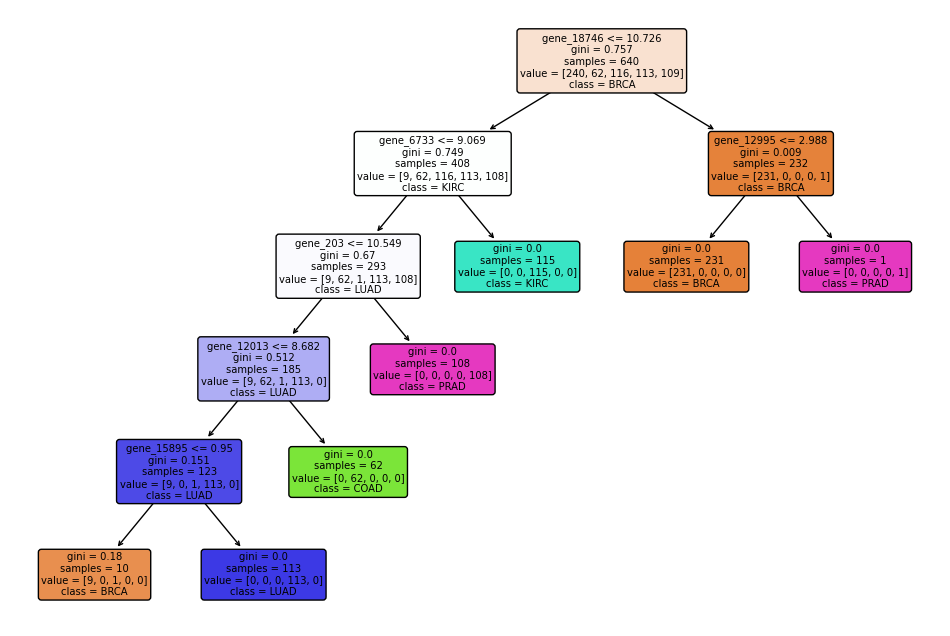

In [108]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=X_train.columns, class_names=le.classes_, filled=True, rounded=True)
plt.show()